# Credit Card Fraud Detection

## Business Understanding

Credit Card Fraud has become a significant issue for bamks and credit card issuer companies. It is important to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. Therefore, a good credit card fraud detection system is requried for identifying the fraudsters and thereby mininmising the losses for financial institutions.

### Business Objective

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. `The business objective is to predict the credit card fraud using the data from the transactions.`

## Goals of Data Analysis

In this project, we will analyse customer-level data of the transactions, build predictive models to identify credit card frauds. Unfortunately, due to confidentiality issues, the original features and more background information about the data are not provided. Instead the PCA components are provided. 

## Data Understanding

In [1]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [3]:
# Import the dataset

creditcard_data = pd.read_csv('creditcard.csv')

#### Inspect the Dataframe

In [4]:
# Head of the dataset

creditcard_data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
# Dimensions of the dataframe

creditcard_data.shape

(284807, 31)

In [6]:
# Statistical aspects of the dataframe

creditcard_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.891827e-12,-9.884878e-13,-5.139894e-13,1.253494e-12,5.842195e-14,3.608239e-13,4.918081e-13,-3.212882e-13,-8.510785e-13,1.112207e-12,1.176851e-12,7.216932e-13,1.092097e-12,-7.627635e-13,-1.210548e-12,-1.093824e-14,-2.922334e-13,3.829196e-13,7.663969e-13,8.176080e-13,-1.192419e-12,-3.211819e-13,9.454030e-14,8.163358e-13,-6.605292e-13,9.231872e-14,4.608328e-13,-1.250964e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Type of each column

creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

#### Insights of Dataset
-  The dataset contains 284,807 entries with 30 features and 1 target variable. 
-  It contains only numerical input variables which are the result of a PCA transformation. 
-  Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 
-  Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
-  The feature 'Amount' is the transaction Amount. 
-  Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
-  There are no null values. Therefore, data cleaning steps is not required.

## Exploratory Data Analysis

Features V1, V2, … V28 are anonymised so we will do EDA of features, Time and Amount, along with target feature, Class.

#### Univariate Analysis

#### Class

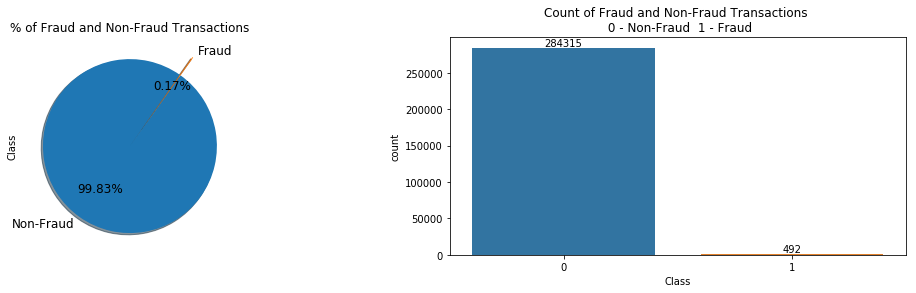

In [8]:
## Plot percentage of Frauds

fig,axes = plt.subplots(1,2)
fig.set_size_inches(18,4)
axes[0].set_title("% of Fraud and Non-Fraud Transactions")
ax_1 = creditcard_data.Class.value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, 
                                             labels=["Non-Fraud", "Fraud"], fontsize=12, startangle=55, ax=axes[0])
axes[1].set_title("Count of Fraud and Non-Fraud Transactions \n 0 - Non-Fraud  1 - Fraud")
ax_2 = sns.countplot(creditcard_data['Class'], ax = axes[1])
for p in ax_2.patches:
    ax_2.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points') 
plt.show()

#### Insights:
- The dataset is **`highly unbalanced`**. 
- Fraudulent transactions account for 0.17% of all transactions and non-fraudulent transactions account for 99.83% of all transactions. 
- Out of the 284,807 transactions, 492 transactions are fraud ones, whereas 284315 transactions are non-fraudulent.

#### Amount

Text(0.5, 1.0, 'Distribution of Transaction Amount \n masking the outliers')

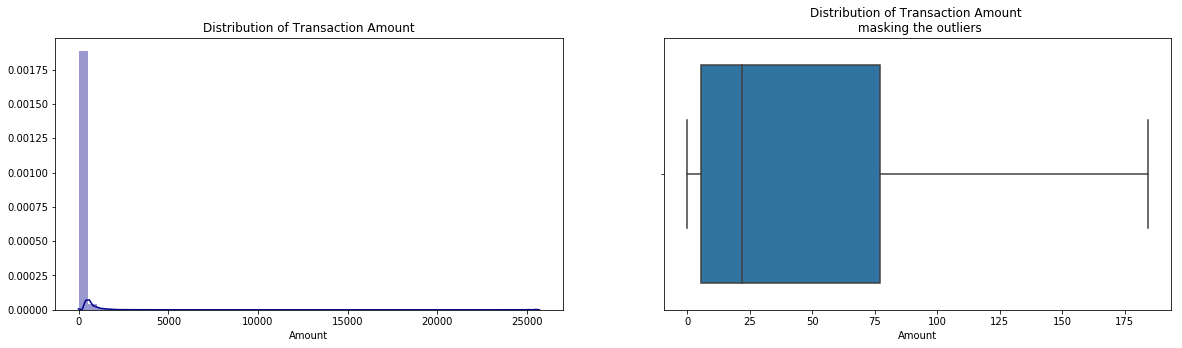

In [9]:
# Distribution of Transaction Amount

fig,axes = plt.subplots(1, 2, figsize = (20,5))
sns.distplot(creditcard_data['Amount'], ax = axes[0], color='darkblue')
axes[0].set_title('Distribution of Transaction Amount')
sns.boxplot(creditcard_data['Amount'], showfliers = False, ax = axes[1])
axes[1].set_title('Distribution of Transaction Amount \n masking the outliers')

#### Insights:
- Feature 'Amount' has a right skewed distribution.
- The transaction amounts range from 0 to 25691.
- From the boxplot, it can be seen that while masking the outliers, the transaction amounts range from 0 to 175.
- Therefore a detail analysis on the transaction amounts based on non-fraud and fraud transactions are required.

#### Time

Text(0.5, 1.0, 'Distribution of Transaction Time in hours')

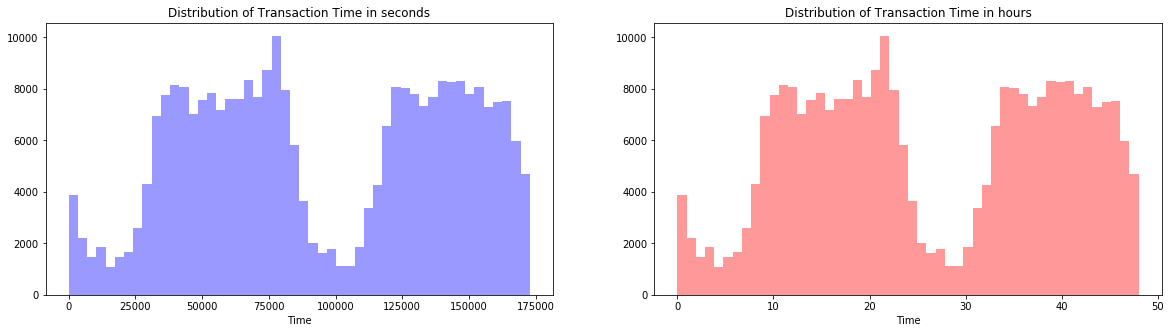

In [10]:
# Distribution of Transaction Time

fig,axes = plt.subplots(1, 2, figsize = (20,5))
sns.distplot(creditcard_data['Time'], kde = False, ax = axes[0], color = 'b')
axes[0].set_title('Distribution of Transaction Time in seconds')
sns.distplot(creditcard_data['Time']/3600,  kde = False, ax = axes[1], color = 'r')
axes[1].set_title('Distribution of Transaction Time in hours')

#### Insights:
- While observing the transaction time in hours plot, we can conclude there is almost same variation along a day.
- There is a number of transactions between the hours 10 to 20. The same pattern is reapeated between the hours of 35 to 45. That is with a difference of 24 hours.

#### Bivariate Analysis

#### Class vs Amount

Text(0.5, 1.0, 'Distribution of Non-Fraud Transaction Amount')

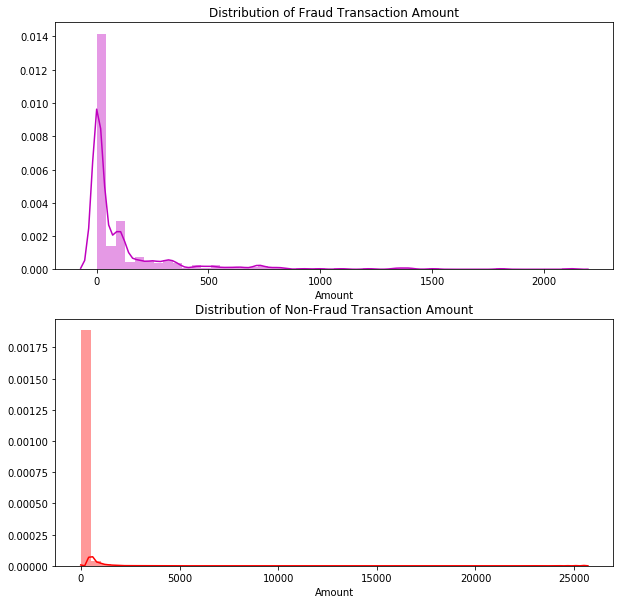

In [11]:
# Distribution of Transaction Amount based on Non-Fraud and Fraud Transactions

fig,axes = plt.subplots(2, 1, figsize = (10, 10))
sns.distplot(creditcard_data['Amount'][creditcard_data['Class'] == 1], ax = axes[0], color='m')
axes[0].set_title('Distribution of Fraud Transaction Amount')
sns.distplot(creditcard_data['Amount'][creditcard_data['Class'] == 0], ax = axes[1], color='r')
axes[1].set_title('Distribution of Non-Fraud Transaction Amount')

In [12]:
creditcard_data.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


#### Insights:
- It can be seen that the fraud transactions are only for small transaction amounts. 
- The normal transactions are for small and big transaction amounts. 
- Therefore, we cannot predict the fraudulent transaction based only on the transaction amount.

#### Class vs Time

Text(0.5, 1.0, 'Distribution of Non-Fraud Transaction Time')

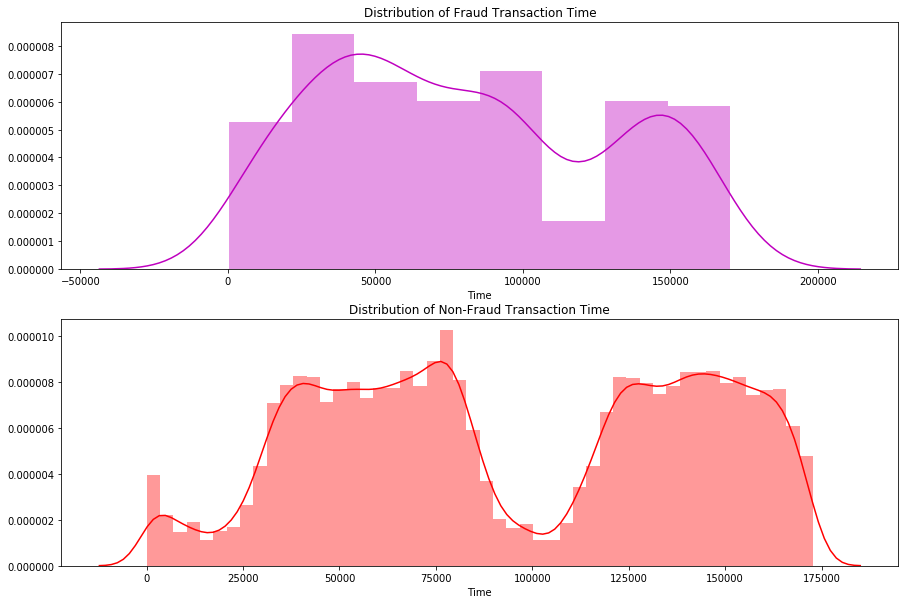

In [13]:
# Distribution of Transaction Amount based on number of Non-Fraud and Fraud Transactions

fig,axes = plt.subplots(2, 1, figsize = (15, 10))
sns.distplot(creditcard_data['Time'][creditcard_data['Class'] == 1], ax = axes[0], color='m')
axes[0].set_title('Distribution of Fraud Transaction Time')
sns.distplot(creditcard_data['Time'][creditcard_data['Class'] == 0], ax = axes[1], color='r')
axes[1].set_title('Distribution of Non-Fraud Transaction Time')

In [14]:
creditcard_data.groupby('Class')['Time'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,94838.202258,47484.015786,0.0,54230.0,84711.0,139333.0,172792.0
1,492.0,80746.806911,47835.365138,406.0,41241.5,75568.5,128483.0,170348.0


#### Insights:
- It can be seen that the fraud transactions are distributed evenly across time. 
- The normal transactions repeat the same pattern for a difference of 24 hours. 
- Therefore, we cannot predict the fraudulent transaction based only on the transaction time.

#### Amount vs Time based on Class

Text(0.5, 1.0, 'Distribution of Non-Fraud Transaction Time')

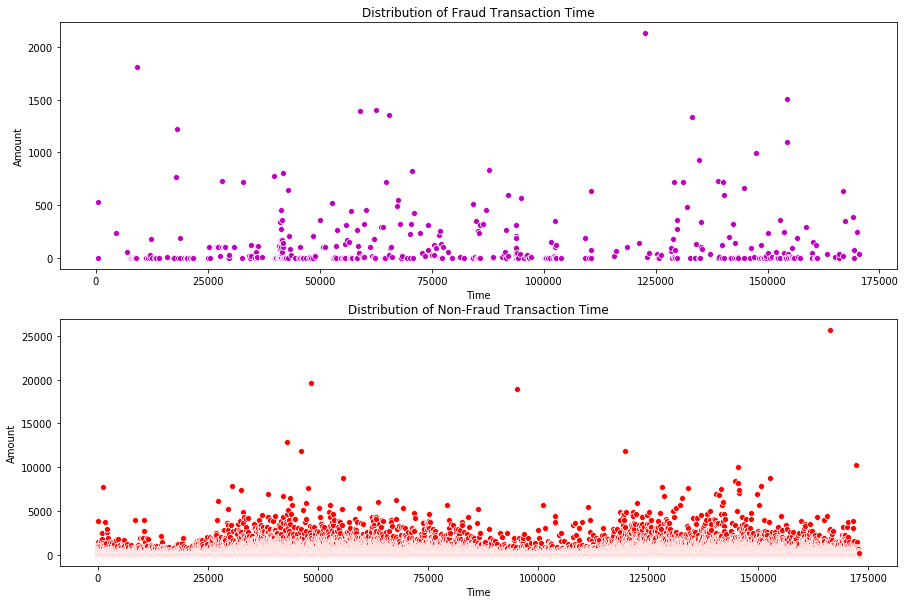

In [15]:
# Distribution of Transaction Time and Transaction Amount based on Non-Fraud and Fraud Transactions

fig,axes = plt.subplots(2, 1, figsize = (15, 10))
sns.scatterplot(creditcard_data['Time'][creditcard_data['Class'] == 1], creditcard_data['Amount'][creditcard_data['Class'] == 1],
                ax = axes[0], color='m')
axes[0].set_title('Distribution of Fraud Transaction Time')
sns.scatterplot(creditcard_data['Time'][creditcard_data['Class'] == 0], creditcard_data['Amount'][creditcard_data['Class'] == 0],
             ax = axes[1], color='r')
axes[1].set_title('Distribution of Non-Fraud Transaction Time')

#### Insights:
- We cannot predict the fraudulent transaction based on the transaction time and amount as the data does not follow any pattern.

#### Correlation of Features

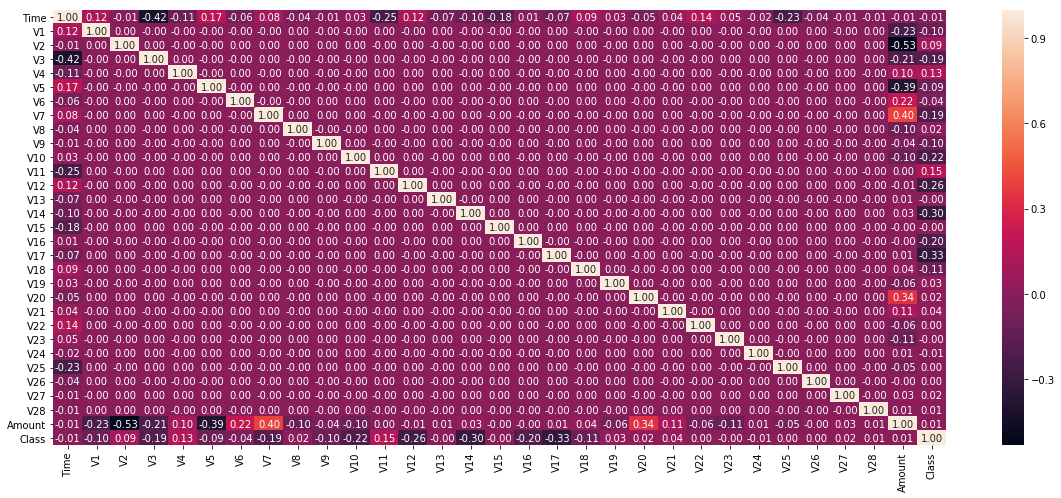

In [16]:
# Correlation of Features

plt.figure(figsize=(20, 8))
sns.heatmap(creditcard_data.corr(), annot=True, fmt = '0.2f')

#### Insights:
- As PCA is done on the features V1 - V28, these are not correlated with each other.
- There is a negative correlation between V3, V11, V25 and Time. Also there is a negative correlation between V2, V5 and Amount.
- There is a positive correlation between V7, V20 and Amount.

## Modelling

In modelling, at first we will split the dataset in train and test data. Then do the Scaling and Sampling.

In [17]:
# Import libraries for modelling

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics

Using TensorFlow backend.


### Train_Test_Split

In [18]:
# Putting feature variable to X

X = creditcard_data.drop(['Class'], axis=1)

X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [19]:
# Putting target variable to y

y = creditcard_data['Class']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

For splitting the data into train and test, StratifiedShuffleSplit is used, so that train and test dataset having equally balanced(stratified) classes.  

In [20]:
#  Generate indices to split data into training and test set.
stratified_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 100)

# Splitting the data into train and test
for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [21]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (199364, 30)
X_test shape: (85443, 30)
y_train shape: (199364,)
y_test shape: (85443,)


### Feature Scaling

In [22]:
# Scaling the features 'Time' and 'Amount'

scaler = StandardScaler()

num_vars = ['Time', 'Amount']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
222925,1.018862,2.053474,-0.149880,-1.092234,0.420978,-0.225796,-1.159629,0.082871,-0.236532,0.733270,0.102520,-0.908262,-0.220082,-1.216003,0.534920,0.227331,-0.103995,-0.158785,-0.802113,0.083010,-0.313465,-0.298362,-0.779702,0.362701,-0.048183,-0.356438,0.205392,-0.075806,-0.063325,-0.358200
163811,0.451206,0.149477,1.112008,-0.391539,-0.557452,1.014727,-0.801985,1.042734,-0.167625,-0.200830,-0.863839,-0.537991,0.418586,1.034272,-1.222412,-0.349818,0.290628,0.298838,-0.333729,-0.226373,0.084311,-0.331768,-0.755443,0.079155,0.587098,-0.383245,0.110292,0.229167,0.086294,-0.352426
196038,0.769295,2.145379,0.215237,-2.221643,-0.067032,0.815822,-1.358596,0.843943,-0.594243,0.009745,-0.021497,-0.476749,0.848265,1.144607,0.555759,0.285353,-0.661516,-0.362293,-0.647254,0.126100,-0.133286,0.153606,0.611995,-0.027494,0.824538,0.505014,0.203037,-0.083225,-0.069468,-0.344755
25173,-1.290876,-0.354219,0.100332,1.721509,-0.884417,-0.371977,-0.062313,-0.144740,0.163123,-1.843755,0.520706,1.627755,-0.263976,-0.100123,0.125968,0.703573,0.591865,0.665795,-1.191246,1.690163,0.295444,0.136969,0.217167,-0.014350,0.016538,-0.326120,-0.285113,0.118226,0.103791,-0.281240
253792,1.297771,-0.439888,1.871311,-1.106687,1.064853,1.239594,-0.633668,1.100319,0.221096,-0.917002,-0.844362,-0.888776,-0.219374,-0.076494,-0.756161,-0.170227,-0.554555,1.442972,0.385060,0.585502,0.024939,0.059066,0.366613,-0.250861,0.494710,0.091257,-0.398552,0.330173,0.219909,-0.337537


In [23]:
# Scale the test data

X_test[num_vars] = scaler.transform(X_test[num_vars])

X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
262922,1.388178,-0.548103,1.376074,0.051147,4.300577,1.761938,0.081805,1.788166,-0.302164,-2.941339,1.393164,-1.873436,-1.746983,-0.852186,1.058096,0.371916,-0.783216,0.322476,0.210874,1.701892,0.451713,0.316647,0.700714,-0.532490,-0.680250,1.232858,0.980223,-0.042880,0.053000,0.054772
123418,-0.376864,0.437324,1.824381,-2.299325,1.538479,0.791887,-1.414298,0.482083,0.339477,-0.674650,-1.234870,1.881042,-0.195098,-0.688822,-2.926057,0.427144,1.279861,2.651797,2.224899,-0.000361,-0.009730,-0.077049,-0.170282,0.108469,-0.365513,-0.436975,-0.393859,0.121535,-0.061320,-0.322318
206135,0.869349,2.056846,0.042030,-1.296059,0.368958,0.032669,-1.349797,0.334441,-0.463096,0.452703,-0.016376,-0.526324,0.801353,1.006171,0.303048,0.637776,-0.262217,-0.553146,-0.181507,-0.244297,-0.167702,0.261879,0.949829,-0.018148,0.109873,0.295611,-0.115295,-0.015115,-0.054976,-0.320256
273483,1.491076,-0.497480,0.785269,1.695245,-0.644791,0.491553,0.430883,0.510721,0.053386,0.552390,-0.545978,-1.545755,-0.957582,-0.913807,-0.066661,1.561068,0.043679,-0.672767,0.650035,1.013564,0.212146,-0.280792,-0.548862,-0.367317,-0.044278,0.430846,-0.657662,0.179848,-0.081837,-0.359396
245758,1.223478,1.611949,-0.938343,-1.200421,0.653356,-0.386518,-0.465937,0.069881,-0.147945,0.849526,0.005008,-1.033421,-0.111964,-0.645005,0.305443,0.414153,0.183540,-0.410625,-0.207679,-0.171987,0.214406,0.081319,-0.184030,0.065733,0.742927,-0.283315,0.172087,-0.091352,-0.009690,0.575804


### Handling Imbalanced Data

Most of the real-world classification problems have some level of class imbalance, which happens when there are not sufficient instances of the data that correspond to either of the class labels. Imbalanced data is to be addressed before providing the data as input to the machine learning algorithm as the the class distribution may get skewed. It can be done by improving classification algorithms or balancing classes in the training data. Few techniques to handle imbalanced dataset are:
1. **Resampling Techniques**<br>
In this technique, either the frequency of the minority class is increased or the frequency of the majority class is decreased. Therefore, approximately the same number of instances for both the classes is obtained. Some of the resampling techniques are:<BR><BR>
    1. **Random Under-Sampling**: Eliminates majority class data randomly, thereby, the majority and minority class datas are balanced. This approach can improve run time and reduce storage issues as the number of training data samples has decreased. But there are chances that useful information may get discarded. Thereby, inaccurate results are produced with the actual test data set.
    2. **Random Over-Sampling**: Increases the number of instances in the minority class by randomly replicating them. Here there is no loss of information. But there are chances of overfitting as it replicates the minority class.
    3. **Cluster-Based Over Sampling**: In this case, the K-means clustering algorithm is independently applied to minority and majority class data. Each cluster is oversampled such that all clusters of the same class have an equal number of instances. But there are chances of over-fitting the training data.
    4. **Informed Over Sampling**: Synthetic Minority Over-sampling Technique (SMOTE) takes a subset of data from the minority class as an example and then new synthetic similar instances are created. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. These synthetic examples are created without considering the majority class, possibly resulting in ambiguous examples if there is a strong overlap for the classes and can introduce additional noise.
    5. **Combination of over- and under-sampling**: SMOTE generated noisy samples by interpolating new points between marginal outliers and inliers. This issue can be solved by cleaning the space resulting from over-sampling. Tomek’s link and edited nearest-neighbours are the two cleaning methods. SMOTETomek and SMOTEENN.<br><br>
2. **Algorithmic Ensemble Techniques**<br>
In this approach, several classifiers are constructed from the original data and then aggregated to make predictions. Some of the ensemble techniques are:<br><br>
    1. **Bagging**:  In the Bootstrap Aggregating(Bagging), ‘n’ different bootstrap training samples with replacement are generated and then takes a mean of all the predictions. Bagging reduces overfitting and variance.
    2. **Boosting**: It is an iterative approach where more weight is given to those cases where incorrectly classified ones in the last round. Some of the boosting techniques are AdaBoost, Gradient Boosting, XGBoost. 

In this analysis, we will use SMOTEENN(Perform over-sampling using SMOTE and cleaning using ENN) for resampling the training dataset.

In [24]:
# Resample using SMOTEENN

sme = SMOTEENN(random_state = 100)
X_resample, y_resample = sme.fit_resample(X_train, y_train)

In [25]:
print('X_resample shape:', X_resample.shape)
print('y_resample shape:', y_resample.shape)

X_resample shape: (397711, 30)
y_resample shape: (397711,)


In [26]:
print('Percentage of Non-Fraud Transactions in resample:{:.2f}%'.format((sum(y_resample == 0)/y_resample.shape[0])*100))
print('Percentage of Fraud Transactions in resample:{:.2f}%'.format((sum(y_resample == 1)/y_resample.shape[0])*100))

Percentage of Non-Fraud Transactions in resample:49.96%
Percentage of Fraud Transactions in resample:50.04%


### Model to Predict the Fraud Transactions

In this modelling, we will be using the Area Under the Precision-Recall Curve. Precision-Recall is a good measure to be used when there is class-imbalance. The Precision-Recall curve shows the trade-off between Precision and Recall. A high Area Undrf Curve represents both high recall and high precision.

### Logistic Regression

In [27]:
# Train the model on the sampled train data

lr = LogisticRegression(max_iter = 500, random_state = 100)
model_lr = lr.fit(X_resample,y_resample)

#### Evaluate on test data

In [28]:
# Predict the fraud on test data

y_pred = model_lr.predict(X_test)

In [29]:
# Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[83243  2052]
 [   16   132]]


In [30]:
# Classification_report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.89      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [31]:
# AUC Score

y_pred_probs = model_lr.predict_proba(X_test)[:,1]
print("AUC : {:2.2f}".format(metrics.average_precision_score(y_test, y_pred_probs)))

AUC : 0.71


The Logistic Regression model provides 98% accuracy, 89% recall score and 71% AUC score. Therefore this model can be used to predict the fraud transactions. However we will do hypertuning to check whether the model can be improved.

### Logistic Regression - Hyperparameter Tuning

#### StratifiedKFold

In [32]:
# creating a StratifiedKFold object with 3 splits 

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

In [33]:
# Hyperparameters

params = {'C':[0.01,0.5,1,5,10], 
          'penalty':['l1','l2'], 
          'solver':['liblinear', 'lbfgs', 'saga']}

# Create model

logreg = LogisticRegression(max_iter = 500, random_state = 100)

# Create GridSearch 

grid_model_lr = GridSearchCV(estimator=logreg, 
                             cv = folds, 
                             param_grid=params, 
                             scoring='average_precision',
                             return_train_score=True,
                             n_jobs=-1, 
                             verbose=1)

In [34]:
# Fit model
grid_model_lr.fit(X_resample, y_resample)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 14.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=100, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='average_precision', verbose=1)

In [35]:
# Best params
print('Best params: %s' % grid_model_lr.best_params_)

# Best training data accuracy
print('Best AUC: %.3f' % round(grid_model_lr.best_score_*100,2))

Best params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best AUC: 99.280


In [36]:
# Initialize the Logistic Regression model with best parameters

logreg_final = LogisticRegression(C = 10, solver = 'lbfgs', penalty = 'l2', max_iter=500, random_state = 100)

In [37]:
# Fit the model

logreg_final.fit(X_resample, y_resample)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
# Predict the fraud on test data

y_pred = logreg_final.predict(X_test)

In [39]:
# Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[83239  2056]
 [   16   132]]


In [40]:
# Classification_report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.89      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [41]:
# AUC Score

y_pred_probs = logreg_final.predict_proba(X_test)[:,1]
print("AUC : {:2.2f}".format(metrics.average_precision_score(y_test, y_pred_probs)))

AUC : 0.72


The Logistic Regression model - Hyperparameter tuning provides 98% accuracy, 89% recall score and 72% AUC score. Therefore this model can be used to predict the fraud transactions. However we will do modelling using other models.

### Decision Tree

In [42]:
# Train the model on the sampled train data

dt = DecisionTreeClassifier(random_state = 100)
model_dt = dt.fit(X_resample,y_resample)

#### Evaluate on test data

In [43]:
# Predict the fraud on test data

y_pred = model_dt.predict(X_test)

In [44]:
# Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[85121   174]
 [   31   117]]


In [45]:
# Classification_report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.40      0.79      0.53       148

    accuracy                           1.00     85443
   macro avg       0.70      0.89      0.77     85443
weighted avg       1.00      1.00      1.00     85443



In [46]:
# AUC Score

y_pred_probs = model_dt.predict_proba(X_test)[:,1]
print("AUC : {:2.2f}".format(metrics.average_precision_score(y_test, y_pred_probs)))

AUC : 0.32


The Decision Tree model provides 100% accuracy, 79% recall score and 32% AUC score. Though Logistic Regression model is better with respect to the results. However we will do hypertuning to check whether the model can be improved.

### Decision Tree - Hyperparameter Tuning

In [47]:
# Hyperparameters

params = {'max_depth': range(5, 15, 5),
          'min_samples_leaf': range(50, 150, 50),
          'min_samples_split': range(50, 150, 50),
          'criterion': ["entropy", "gini"]}

# Create model

dt_grid = DecisionTreeClassifier()

# Create GridSearch 

grid_model_dt = GridSearchCV(estimator=dt_grid, 
                                 cv = folds, 
                                 param_grid=params, 
                                 scoring='average_precision',
                                 return_train_score=True,
                                 n_jobs=-1, 
                                 verbose=1)

In [48]:
# Fit model
grid_model_dt.fit(X_resample, y_resample)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
         

In [49]:
# Best params
print('Best params: %s' % grid_model_dt.best_params_)

# Best training data accuracy
print('Best AUC: %.3f' % round(grid_model_dt.best_score_*100,2))

Best params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}
Best AUC: 99.860


In [50]:
# Initialize the Decision Tree model with best parameters

dt_final = DecisionTreeClassifier(criterion = 'entropy', 
                                    max_depth = 10, 
                                    min_samples_leaf = 50, 
                                    min_samples_split = 50,
                                 random_state=100)

In [51]:
# Fit the model

dt_final.fit(X_resample, y_resample)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [52]:
# Predict the fraud transactions on test data

y_pred = dt_final.predict(X_test)

In [53]:
# Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[83853  1442]
 [   20   128]]


In [54]:
# Classification_report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.08      0.86      0.15       148

    accuracy                           0.98     85443
   macro avg       0.54      0.92      0.57     85443
weighted avg       1.00      0.98      0.99     85443



In [55]:
# AUC Score

y_pred_probs = dt_final.predict_proba(X_test)[:,1]
print("AUC : {:2.2f}".format(metrics.average_precision_score(y_test, y_pred_probs)))

AUC : 0.68


The Decision Tree model - Hyperparameter tuning provides 98% accuracy, 86% recall score and 68% AUC score. Therefore this model can be used to predict the fraud transactions. However we will do modelling using other models.

### Random Forest

In [56]:
# Train the model on the sampled train data

rf = RandomForestClassifier(random_state=100)
model_rf = rf.fit(X_resample,y_resample)

#### Evaluate on test data

In [57]:
# Predict the fraud on test data

y_pred = model_rf.predict(X_test)

In [58]:
# Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[85270    25]
 [   25   123]]


In [59]:
# Classification_report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.83      0.83       148

    accuracy                           1.00     85443
   macro avg       0.92      0.92      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [60]:
# AUC Score

y_pred_probs = model_rf.predict_proba(X_test)[:,1]
print("AUC : {:2.2f}".format(metrics.average_precision_score(y_test, y_pred_probs)))

AUC : 0.83


The Random Forest model provides 100% accuracy, 83% recall score and 83% AUC score. We will do hypertuning to check whether the model can be improved.

### Random Forest - Hyperparameter Tuning

In [61]:
# Hyperparameters

params = {'max_depth': [10,15], # Deeper the tree, more the splits
          'min_samples_leaf': [25, 50],
          'min_samples_split': [20, 40],
          'max_features': [2, 3]
}

# Create model

rf_grid = RandomForestClassifier(random_state=100)

# Create GridSearch 

grid_model_rf = GridSearchCV(estimator=rf_grid, 
                                 cv = folds, 
                                 param_grid=params, 
                                 scoring='average_precision',
                                 return_train_score=True,
                                 n_jobs=-1, 
                                 verbose=1)

In [62]:
# Fit model
grid_model_rf.fit(X_resample, y_resample)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 16.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                           

In [63]:
# Best params
print('Best params: %s' % grid_model_rf.best_params_)

# Best training data accuracy
print('Best AUC: %.3f' % round(grid_model_rf.best_score_*100,2))

Best params: {'max_depth': 15, 'max_features': 3, 'min_samples_leaf': 25, 'min_samples_split': 20}
Best AUC: 100.000


In [64]:
# Initialize the Random Forest model with best parameters

rf_final = RandomForestClassifier(max_depth = 15, 
                                      max_features = 3,
                                      min_samples_leaf = 25, 
                                      min_samples_split = 20,
                                      random_state=100)

In [65]:
# Fit the model

rf_final.fit(X_resample, y_resample)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [66]:
# Predict the fraud transactions on test data

y_pred = rf_final.predict(X_test)

In [67]:
# Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[85213    82]
 [   24   124]]


In [68]:
# Classification_report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.60      0.84      0.70       148

    accuracy                           1.00     85443
   macro avg       0.80      0.92      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [69]:
# AUC Score

y_pred_probs = rf_final.predict_proba(X_test)[:,1]
print("AUC : {:2.2f}".format(metrics.average_precision_score(y_test, y_pred_probs)))

AUC : 0.81


The Random Forest model - Hyperparameter tuning provides 100% accuracy, 84% recall score and 81% AUC score. Therefore this model can be used to predict the fraud transactions. However we will do modelling using other models.

### Gradient Boost Classifier

In [70]:
# Train the model on the sampled train data

gradientboost = GradientBoostingClassifier(random_state=100)

# Fit the model
model_gradientboost = gradientboost.fit(X_resample,y_resample)

#### Evaluate on test data

In [71]:
# Predict the fraud on test data

y_pred = model_gradientboost.predict(X_test)

In [72]:
# Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[84488   807]
 [   20   128]]


In [73]:
# Classification_report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.14      0.86      0.24       148

    accuracy                           0.99     85443
   macro avg       0.57      0.93      0.62     85443
weighted avg       1.00      0.99      0.99     85443



In [74]:
# AUC Score

y_pred_probs = model_gradientboost.predict_proba(X_test)[:,1]
print("AUC : {:2.2f}".format(metrics.average_precision_score(y_test, y_pred_probs)))

AUC : 0.75


The Gradient Boost Classifier model provides 99% accuracy, 86% recall score and 75% AUC score. We will do hypertuning to check whether the model can be improved.

### Gradient Boost Classifier - Hyperparameter Tuning

In [75]:
# Hyperparameters

params = {"learning_rate": [0.2, 0.6],
          "subsample": [0.3, 0.6]
}

gradientboost_grid = GradientBoostingClassifier(random_state=100)

# Create GridSearch 

grid_model_gradientboost = GridSearchCV(estimator=gradientboost_grid, 
                                 cv = folds, 
                                 param_grid=params, 
                                 scoring='average_precision',
                                 return_train_score=True,
                                 n_jobs=-1, 
                                 verbose=1)

In [76]:
# Fit model
grid_model_gradientboost.fit(X_resample, y_resample)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:  9.6min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  9.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  m...n_leaf=0.0,
                                                  n_estimators=100,
                         

In [77]:
# Best params
print('Best params: %s' % grid_model_gradientboost.best_params_)

# Best training data accuracy
print('Best AUC: %.3f' % round(grid_model_gradientboost.best_score_*100,2))

Best params: {'learning_rate': 0.6, 'subsample': 0.6}
Best AUC: 99.990


In [78]:
# Initialize the Gradient Boost Classifier model with best parameters

gradientboost_final = GradientBoostingClassifier(random_state=100, learning_rate=0.6, subsample=0.6)

In [79]:
# Fit the model

gradientboost_final.fit(X_resample, y_resample)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.6, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=100, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [80]:
# Predict the fraud transactions on test data

y_pred = gradientboost_final.predict(X_test)

In [81]:
# Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[85076   219]
 [   23   125]]


In [82]:
# Classification_report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.36      0.84      0.51       148

    accuracy                           1.00     85443
   macro avg       0.68      0.92      0.75     85443
weighted avg       1.00      1.00      1.00     85443



In [83]:
# AUC Score

y_pred_probs = gradientboost_final.predict_proba(X_test)[:,1]
print("AUC : {:2.2f}".format(metrics.average_precision_score(y_test, y_pred_probs)))

AUC : 0.79


The Gradient Boost Classifier model - Hyperparameter tuning provides 100% accuracy, 84% recall score and 79% AUC score. Therefore this model can be used to predict the fraud transactions. However we will do modelling using other models.

### XGBoost

In [84]:
# Train the model on the train data

xgb = XGBClassifier(random_state=100)
model_xgb = xgb.fit(X_resample,y_resample)

#### Evaluate on test data

In [85]:
# Predict the fraud transactions on test data

y_pred = model_xgb.predict(X_test)

In [86]:
# Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[84463   832]
 [   20   128]]


In [87]:
# Classification_report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.13      0.86      0.23       148

    accuracy                           0.99     85443
   macro avg       0.57      0.93      0.61     85443
weighted avg       1.00      0.99      0.99     85443



In [88]:
# AUC Score

y_pred_probs = model_xgb.predict_proba(X_test)[:,1]
print("AUC : {:2.2f}".format(metrics.roc_auc_score(y_test, y_pred_probs)))

AUC : 0.98


The XGBoost Classifier model provides 99% accuracy, 86% recall score and 98% AUC score.  However we will do hypertuning to check whether the model can be improved.

### XGBoostClassifier - Hyperparameter Tuning

In [89]:
# Hyperparameters

params = {'learning_rate': [0.2, 0.3], 
          'subsample': [0.6, 0.9]}

# Create model

xgb_grid = XGBClassifier(random_state=100)

# Create GridSearch 

grid_model_xgb = GridSearchCV(estimator=xgb_grid, 
                                 cv = folds, 
                                 param_grid=params, 
                                 scoring='roc_auc',
                                 return_train_score=True,
                                 n_jobs=-1, 
                                 verbose=1)

In [90]:
# Fit model
grid_model_xgb.fit(X_resample, y_resample)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:  9.5min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  9.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.3], 'subsample': [0

In [91]:
# Best params
print('Best params: %s' % grid_model_xgb.best_params_)

# Best training data accuracy
print('Best AUC: %.3f' % round(grid_model_xgb.best_score_*100,2))

Best params: {'learning_rate': 0.3, 'subsample': 0.9}
Best AUC: 100.000


In [78]:
# Initialize the XGBoost model with best parameters

xgb_final = XGBClassifier(random_state=100, learning_rate = 0.3, subsample = 0.9)

In [79]:
# Fit the model

xgb_final.fit(X_resample, y_resample)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [80]:
# Predict the fraud transactions on test data

y_pred = xgb_final.predict(X_test)

In [81]:
# Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[85002   293]
 [   21   127]]


In [82]:
# Classification_report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.30      0.86      0.45       148

    accuracy                           1.00     85443
   macro avg       0.65      0.93      0.72     85443
weighted avg       1.00      1.00      1.00     85443



In [83]:
# AUC Score

y_pred_probs = xgb_final.predict_proba(X_test)[:,1]
print("AUC : {:2.2f}".format(metrics.roc_auc_score(y_test, y_pred_probs)))

AUC : 0.98


The XGBoostClassifier model with PCA - Hyperparameter tuning provides 100% accuracy, 86% recall score and 98% AUC score.

### Conclusion

It can be concluded that XGBoost Classifier model can be used to predict the fraud transactions. The model works with 100% accuracy and high sensitivity score of 86% to find the fraudulent transactions. Also, the Area Under the Precision-Recall Curve is 98%.